# Reddit Data Analysis with Pandas

This notebook provides a template for analyzing Reddit data exported from the pipeline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [2]:
# Load the data
posts_df = pd.read_csv('reddit_posts.csv')
comments_df = pd.read_csv('reddit_comments.csv')
all_data_df = pd.read_csv('reddit_all_data.csv')

print(f'Loaded {len(posts_df)} posts and {len(comments_df)} comments')
print(f'Total items: {len(all_data_df)}')

Loaded 199 posts and 6491 comments
Total items: 6690


In [5]:
# Basic data exploration
print('Data Overview:')
print(all_data_df.info())
print('First few rows:')
print(all_data_df.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6690 entries, 0 to 6689
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6690 non-null   object 
 1   title         199 non-null    object 
 2   text          0 non-null      float64
 3   cleaned_text  6690 non-null   object 
 4   author        6690 non-null   object 
 5   subreddit     199 non-null    object 
 6   score         6690 non-null   int64  
 7   upvote_ratio  199 non-null    float64
 8   num_comments  199 non-null    float64
 9   created_utc   6690 non-null   object 
 10  url           199 non-null    object 
 11  is_self       199 non-null    float64
 12  word_count    6690 non-null   int64  
 13  char_count    6690 non-null   int64  
 14  cluster_id    6690 non-null   int64  
 15  type          6690 non-null   object 
 16  post_id       6491 non-null   object 
dtypes: float64(4), int64(4), object(9)
memory usage: 888.6+ 

Posts/Comments by Subreddit:
subreddit
Medicare            20
AskDocs             20
MentalHealth        20
Health              20
Obamacare           20
medical             20
Pharmacy            20
ChronicIllness      19
Medicaid            19
healthinsurance     19
medicalproviders     2
Name: count, dtype: int64


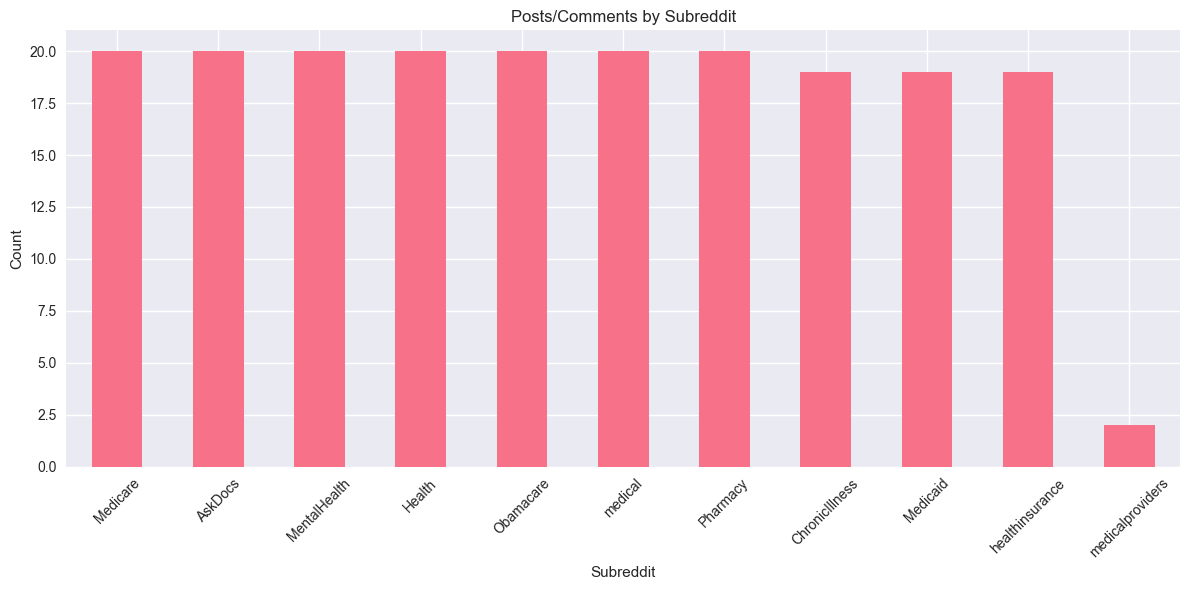

In [6]:
# Subreddit analysis
subreddit_counts = all_data_df['subreddit'].value_counts()
print('Posts/Comments by Subreddit:')
print(subreddit_counts)

plt.figure(figsize=(12, 6))
subreddit_counts.plot(kind='bar')
plt.title('Posts/Comments by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

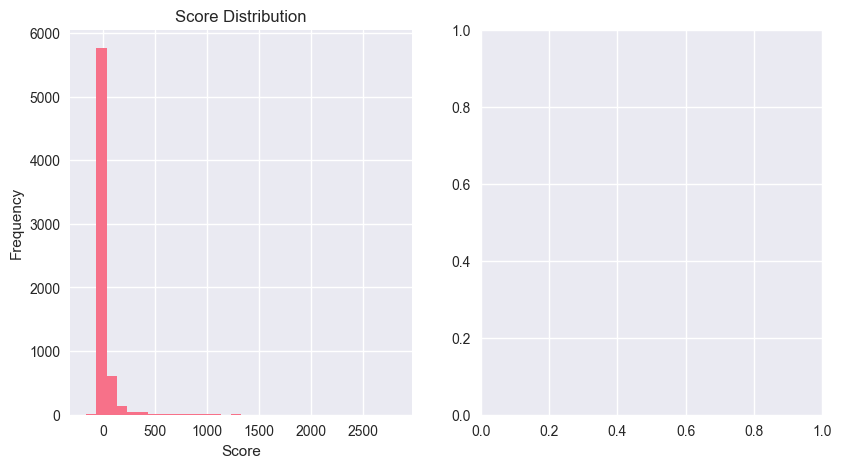

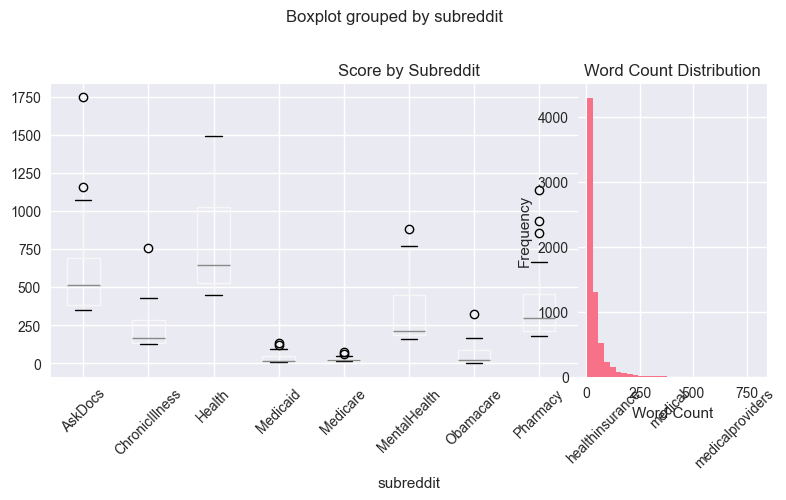

In [7]:
# Score analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
all_data_df['score'].hist(bins=30)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
all_data_df.boxplot(column='score', by='subreddit')
plt.title('Score by Subreddit')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
all_data_df['word_count'].hist(bins=30)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Cluster Distribution:
cluster_id
-1     949
 0    5709
 1      12
 2      10
 3      10
Name: count, dtype: int64


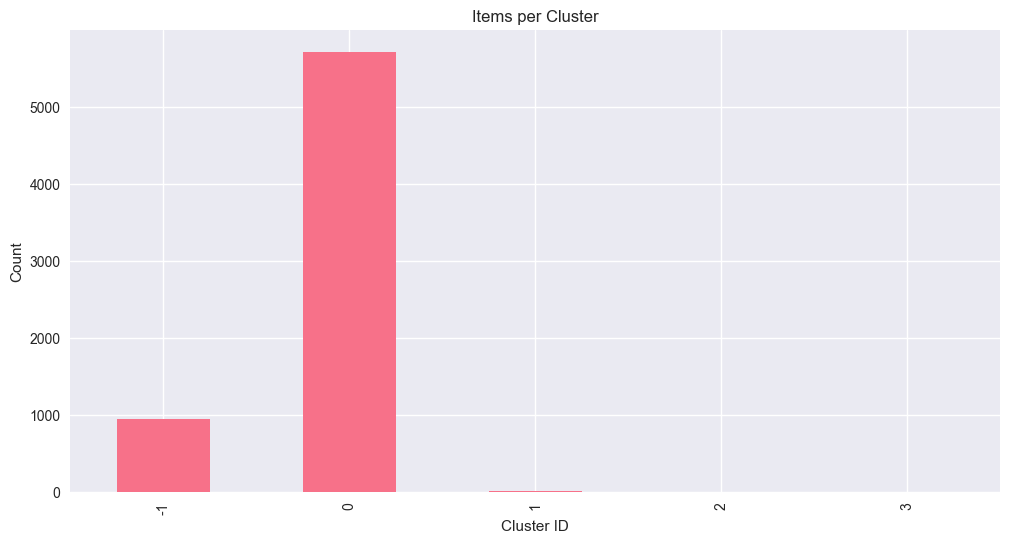

In [8]:
# Cluster analysis (if available)
if 'cluster_id' in all_data_df.columns:
    cluster_counts = all_data_df['cluster_id'].value_counts().sort_index()
    print('Cluster Distribution:')
    print(cluster_counts)
    
    plt.figure(figsize=(12, 6))
    cluster_counts.plot(kind='bar')
    plt.title('Items per Cluster')
    plt.xlabel('Cluster ID')
    plt.ylabel('Count')
    plt.show()

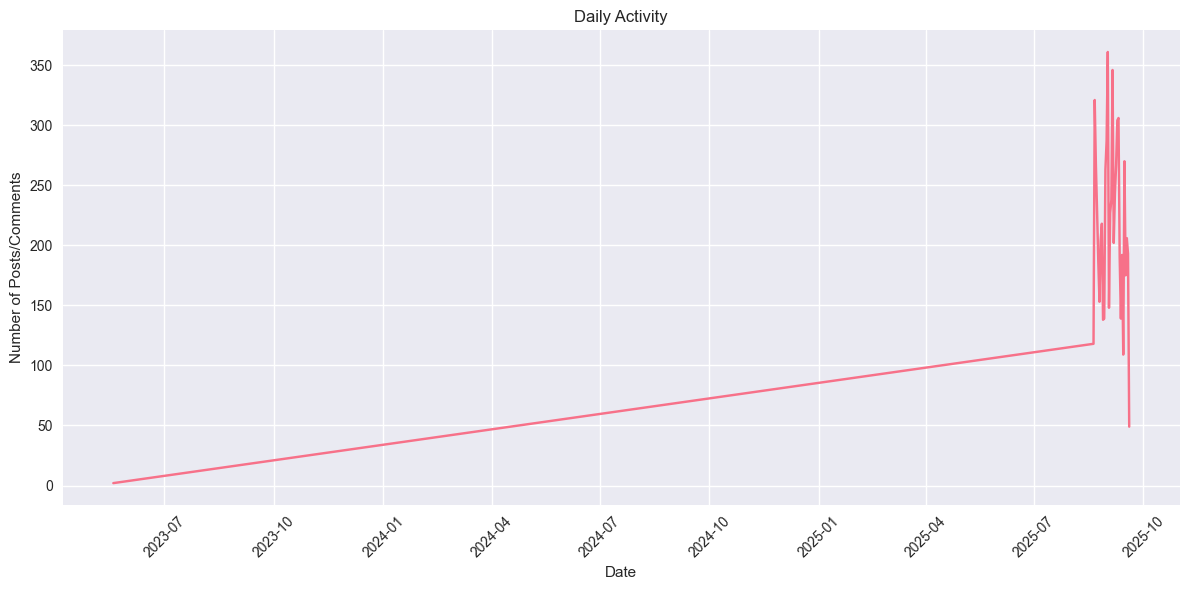

In [9]:
# Time series analysis
all_data_df['created_utc'] = pd.to_datetime(all_data_df['created_utc'])
all_data_df['date'] = all_data_df['created_utc'].dt.date

daily_counts = all_data_df.groupby('date').size()
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line')
plt.title('Daily Activity')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()